In [147]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import pandas as pd

import glob
import imageio
import matplotlib.pyplot as plt
import time

from IPython import display

In [148]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

Importation of the data of each label separated

In [149]:
def div_127(x):
   return((x-127.5)/127.5)

#def div_127(x):
   # return(x/255)

layer_div_127 = keras.Sequential([tf.keras.layers.Lambda(div_127)])


path_train_normal='Dataset2/train_NORMAL'
train_set_normal= tf.keras.preprocessing.image_dataset_from_directory(
            path_train_normal,
            label_mode=None,
            class_names=None,
            color_mode="rgb",
            batch_size=8,
            image_size=(224, 224),
            shuffle=False,
            seed=None,
            validation_split=None,
            subset=None,
            interpolation="bilinear",
            follow_links=False,
        )

train_set_normal = train_set_normal.map(lambda x: (layer_div_127(x)))

# We manually balance the dataset

path_train_pneumonia='Dataset2/train_PNEUMONIA'
train_set_pneumonia= tf.keras.preprocessing.image_dataset_from_directory(
            path_train_pneumonia,
            label_mode=None,
            class_names=None,
            color_mode="rgb",
            batch_size=8,
            image_size=(224, 224),
            shuffle=False,
            seed=None,
            validation_split=None,
            subset=None,
            interpolation="bilinear",
            follow_links=False,
        )

train_set_pneumonia=train_set_pneumonia.take(34*4)
train_set_pneumonia = train_set_pneumonia.map(lambda x: (layer_div_127(x)))



path_validation='Dataset2/validation'
validation_set=tf.keras.preprocessing.image_dataset_from_directory(
            path_validation,
            labels="inferred",
            label_mode="categorical",
            class_names=None,
            color_mode="rgb",
            batch_size=8,
            image_size=(224, 224),
            shuffle=False,
            seed=None,
            validation_split=None,
            subset=None,
            interpolation="bilinear",
            follow_links=False,
        )


path_test='Dataset2/test'
test_set=tf.keras.preprocessing.image_dataset_from_directory(
            path_test,
            labels="inferred",
            label_mode="categorical",
            class_names=None,
            color_mode="rgb",
            batch_size=8,
            image_size=(224, 224),
            shuffle=False,
            seed=None,
            validation_split=None,
            subset=None,
            interpolation="bilinear",
            follow_links=False,
        )

# We manually balance the dataset
test_set=test_set.take(16*4).shuffle(16*32,reshuffle_each_iteration=False)


print("Number of training samples: %d" % tf.data.experimental.cardinality(train_set_normal))
print("Number of validation samples: %d" % tf.data.experimental.cardinality(validation_set))

Found 1217 files belonging to 1 classes.
Found 3751 files belonging to 1 classes.
Found 264 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Number of training samples: 153
Number of validation samples: 33


In [150]:
train_set_pneumonia

<MapDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [151]:
train_set_normal

<MapDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [152]:
AUTOTUNE = tf.data.AUTOTUNE
#train_set_normal_6 = train_set_normal.take(4*4)
train_set_normal_16 = train_set_normal.take(150)
#train_set_normal_32 = train_set_normal.take(32)
#del train_set_normal
#train_set_normal = train_set_normal.cache().prefetch(buffer_size=AUTOTUNE)
#train_set_normal_6 = train_set_normal_6.cache().prefetch(buffer_size=AUTOTUNE)
train_set_normal_16 = train_set_normal_16.cache().prefetch(buffer_size=AUTOTUNE)
#train_set_normal_32 = train_set_normal_32.cache().prefetch(buffer_size=AUTOTUNE)
val_set = validation_set.cache().prefetch(buffer_size=AUTOTUNE)

#train_set_pneumonia_6 = train_set_pneumonia.take(4*4)
train_set_pneumonia_16 = train_set_pneumonia.take(150)
#train_set_pneumonia_32 = train_set_pneumonia.take(32)
#del train_set_pneumonia
#train_set_pneumonia = train_set_pneumonia.cache().prefetch(buffer_size=AUTOTUNE)
#train_set_pneumonia_6 = train_set_pneumonia_6.cache().prefetch(buffer_size=AUTOTUNE)
train_set_pneumonia_16 = train_set_pneumonia_16.cache().prefetch(buffer_size=AUTOTUNE)
#train_set_pneumonia_32 = train_set_pneumonia_32.cache().prefetch(buffer_size=AUTOTUNE)

In [153]:
print("Number of training samples: %d" % tf.data.experimental.cardinality(train_set_normal_16))
print("Number of validation samples: %d" % tf.data.experimental.cardinality(train_set_pneumonia_16))

Number of training samples: 150
Number of validation samples: 136


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


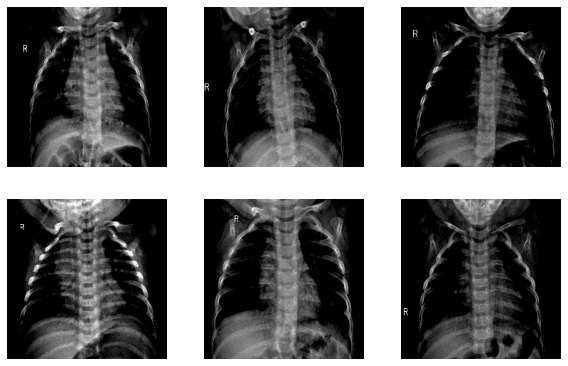

In [154]:
plt.figure(figsize=(10, 10))
for images in train_set_normal.take(1):
    for i in range(6):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(images[i].numpy())
      plt.axis("off")

In [155]:
'''plt.figure(figsize=(10, 10))
for images in train_set_normal.take(1):
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      print(np.uint8(images[i].numpy()))
      plt.imshow(np.uint8(images[i].numpy()))
      #print((np.uint8(images[i].numpy()*255)))
      #plt.imshow((np.uint8(images[i].numpy()*255)/255))
      #plt.imshow(cv2.fastNlMeansDenoisingColored(np.uint8(images[i].numpy()*255),None,10,10,7,21))
      plt.axis("off")'''

'plt.figure(figsize=(10, 10))\nfor images in train_set_normal.take(1):\n    for i in range(9):\n      ax = plt.subplot(3, 3, i + 1)\n      print(np.uint8(images[i].numpy()))\n      plt.imshow(np.uint8(images[i].numpy()))\n      #print((np.uint8(images[i].numpy()*255)))\n      #plt.imshow((np.uint8(images[i].numpy()*255)/255))\n      #plt.imshow(cv2.fastNlMeansDenoisingColored(np.uint8(images[i].numpy()*255),None,10,10,7,21))\n      plt.axis("off")'

Definition of the varaibles and functions used to create the GAN 

In [156]:
EPOCHS = 1000
noise_dim = 500
num_examples_to_generate = 8
BATCH_SIZE=8

seed = tf.random.normal([num_examples_to_generate, noise_dim])
#seed = tf.random.normal([BATCH_SIZE//4, 224,224,3])
acc=tf.keras.metrics.Accuracy()

In [157]:
# Si probleme remettre 5 au lieu de 4 en taille de conv
'''
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(14*14*1024, use_bias=False, input_shape=(noise_dim,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(0.2))

    model.add(layers.Reshape((14, 14, 1024)))

    model.add(layers.Conv2DTranspose(512, (4, 4), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 28, 28, 512)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(0.2))

    model.add(layers.Conv2DTranspose(256, (4, 4), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 56, 56, 256)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(0.2))

    model.add(layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 112, 112, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(0.2))

    model.add(layers.Conv2DTranspose(3, (4, 4), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 224, 224, 3)


    return model'''

"\ndef make_generator_model():\n    model = tf.keras.Sequential()\n    model.add(layers.Dense(14*14*1024, use_bias=False, input_shape=(noise_dim,)))\n    model.add(layers.BatchNormalization())\n    model.add(layers.LeakyReLU(0.2))\n\n    model.add(layers.Reshape((14, 14, 1024)))\n\n    model.add(layers.Conv2DTranspose(512, (4, 4), strides=(2, 2), padding='same', use_bias=False))\n    assert model.output_shape == (None, 28, 28, 512)\n    model.add(layers.BatchNormalization())\n    model.add(layers.LeakyReLU(0.2))\n\n    model.add(layers.Conv2DTranspose(256, (4, 4), strides=(2, 2), padding='same', use_bias=False))\n    assert model.output_shape == (None, 56, 56, 256)\n    model.add(layers.BatchNormalization())\n    model.add(layers.LeakyReLU(0.2))\n\n    model.add(layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', use_bias=False))\n    assert model.output_shape == (None, 112, 112, 128)\n    model.add(layers.BatchNormalization())\n    model.add(layers.LeakyReLU(0.2))\n\n 

In [158]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(14*14*1024, use_bias=False, input_shape=(noise_dim,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(0.2))

    model.add(layers.Reshape((14, 14, 1024)))

    model.add(layers.UpSampling2D(size=(2, 2), interpolation='nearest'))
    model.add(layers.Conv2D(512, (3, 3), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 28, 28, 512)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(0.2))


    model.add(layers.UpSampling2D(size=(2, 2), interpolation='nearest'))
    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 56, 56, 256)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(0.2))

    model.add(layers.UpSampling2D(size=(2, 2), interpolation='nearest'))
    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 112, 112, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(0.2))

    model.add(layers.UpSampling2D(size=(2, 2), interpolation='nearest'))
    model.add(layers.Conv2D(3, (3, 3), strides=(1, 1), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 224, 224, 3)

    return model

In [159]:

'''def make_block_down(inputs):
  
  x=layers.Conv2D(64,3,1,padding='same')(inputs)
  x=layers.LeakyReLU(0.2)(x)
  x=layers.BatchNormalization()(x)
  y=x

  x=layers.Conv2D(64,3,1,padding='same')(x)
  x=layers.LeakyReLU(0.2)(x)
  x=layers.BatchNormalization()(x)
  z=x

  x=layers.Add()([x, y])
  x=layers.Conv2D(64,3,1,padding='same')(x)
  x=layers.LeakyReLU(0.2)(x)
  x=layers.BatchNormalization()(x)

  x=layers.Add()([x, z])
  x=layers.Conv2D(64,2,2)(x)
  x=layers.LeakyReLU(0.2)(x)
  x=layers.BatchNormalization()(x)
  x=layers.Dropout(0.5)(x)
  return(x)

def make_block_up(inputs,channels):
  
  x=layers.Conv2D(channels,3,1,padding='same')(inputs)
  x=layers.LeakyReLU(0.2)(x)
  x=layers.BatchNormalization()(x)
  y=x

  x=layers.Conv2D(channels,3,1,padding='same')(x)
  x=layers.LeakyReLU(0.2)(x)
  x=layers.BatchNormalization()(x)
  z=x

  x=layers.Add()([x, y])
  x=layers.Conv2D(channels,3,1,padding='same')(x)
  x=layers.LeakyReLU(0.2)(x)
  x=layers.BatchNormalization()(x)

  x=layers.Add()([x, z])
  x=layers.UpSampling2D(size=(2, 2), interpolation='nearest')(x)
  x=layers.Conv2D(channels,3, strides=1, padding='same')(x)
  x=layers.LeakyReLU(0.2)(x)
  x=layers.BatchNormalization()(x)
  x=layers.Dropout(0.5)(x)
  return(x)

  
def make_generator_model():
  inputs = keras.Input(shape=(224, 224, 3))
  x=make_block_down(inputs)
  x=make_block_down(x)
  x=make_block_down(x)
  x=make_block_down(x)

  x=make_block_up(x,128)
  x=make_block_up(x,64)
  x=make_block_up(x,32)
  x=make_block_up(x,16)
  outputs=layers.Conv2D(3,3, strides=1, padding='same',activation='tanh')(x)
  model=keras.Model(inputs=inputs, outputs=outputs)

  return(model)
'''


  


"def make_block_down(inputs):\n  \n  x=layers.Conv2D(64,3,1,padding='same')(inputs)\n  x=layers.LeakyReLU(0.2)(x)\n  x=layers.BatchNormalization()(x)\n  y=x\n\n  x=layers.Conv2D(64,3,1,padding='same')(x)\n  x=layers.LeakyReLU(0.2)(x)\n  x=layers.BatchNormalization()(x)\n  z=x\n\n  x=layers.Add()([x, y])\n  x=layers.Conv2D(64,3,1,padding='same')(x)\n  x=layers.LeakyReLU(0.2)(x)\n  x=layers.BatchNormalization()(x)\n\n  x=layers.Add()([x, z])\n  x=layers.Conv2D(64,2,2)(x)\n  x=layers.LeakyReLU(0.2)(x)\n  x=layers.BatchNormalization()(x)\n  x=layers.Dropout(0.5)(x)\n  return(x)\n\ndef make_block_up(inputs,channels):\n  \n  x=layers.Conv2D(channels,3,1,padding='same')(inputs)\n  x=layers.LeakyReLU(0.2)(x)\n  x=layers.BatchNormalization()(x)\n  y=x\n\n  x=layers.Conv2D(channels,3,1,padding='same')(x)\n  x=layers.LeakyReLU(0.2)(x)\n  x=layers.BatchNormalization()(x)\n  z=x\n\n  x=layers.Add()([x, y])\n  x=layers.Conv2D(channels,3,1,padding='same')(x)\n  x=layers.LeakyReLU(0.2)(x)\n  x=layers.

In [160]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', input_shape=[224, 224, 3]))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (6, 6), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (6, 6), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1))

    return model

In [161]:
  def make_discriminator_model2():
    model = tf.keras.Sequential([
      layers.GaussianNoise(0.1),
      layers.Conv2D(16, 3, padding='same'),
      layers.LeakyReLU(alpha=0.2),
      layers.BatchNormalization(),
      layers.Dropout(0.4),
      layers.MaxPooling2D(),

      layers.Conv2D(32, 3, padding='same'),
      layers.LeakyReLU(alpha=0.2),
      layers.BatchNormalization(),
      layers.Dropout(0.4),
      layers.MaxPooling2D(),

      layers.Conv2D(64, 5, padding='same'),
      layers.LeakyReLU(alpha=0.2),
      layers.BatchNormalization(),
      layers.Dropout(0.4),
      layers.MaxPooling2D(),

      layers.Flatten(),
      layers.Dense(128),
      layers.LeakyReLU(alpha=0.2),
      layers.Dropout(0.4),
      layers.Dense(1,activation='sigmoid')
    ])
    return model

In [162]:
#A annuler peut etre
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
#cross_entropy =tf.keras.losses.MeanSquaredError()

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output)-0.1, real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output)+0.1, fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output)-0.1, fake_output)

In [163]:
def generator_acc(fake_output):
  acc.reset_states()
  acc.update_state(tf.ones_like(fake_output), fake_output)
  return acc.result()

def discriminator_acc(real_output, fake_output):
  acc.reset_states()
  acc.update_state(tf.ones_like(real_output), real_output)
  acc.update_state(tf.zeros_like(fake_output), fake_output)
  return acc.result()

In [164]:
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    #noise = tf.random.normal([BATCH_SIZE//4, 224,224,3])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [165]:
def train_normal(dataset, epochs):
  for epoch in range(epochs):
    print(epoch)

    for image_batch in dataset:
      train_step(image_batch)


'''def train_normal(dataset, epochs):
  for epoch in range(epochs):
    print(epoch)
    if epoch%10==0:
      #noise = tf.random.normal([BATCH_SIZE//4, 224,224,3])
      noise = tf.random.normal([BATCH_SIZE, noise_dim])
      generate_and_save_images(generator,epochs,seed)  

    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    #noise = tf.random.normal([BATCH_SIZE//4, 224,224,3])
    generated_images = generator(noise, training=True)
    real_output = discriminator(images, training=True)
    fake_output = discriminator(generated_images, training=True)
    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(real_output, fake_output)

    print(gen_loss)
    print(disc_loss)    

    for image_batch in dataset:
      train_step(image_batch)'''


    
      
  #generate_and_save_images(generator,epochs,seed)

'def train_normal(dataset, epochs):\n  for epoch in range(epochs):\n    print(epoch)\n    if epoch%10==0:\n      #noise = tf.random.normal([BATCH_SIZE//4, 224,224,3])\n      noise = tf.random.normal([BATCH_SIZE, noise_dim])\n      generate_and_save_images(generator,epochs,seed)  \n\n    noise = tf.random.normal([BATCH_SIZE, noise_dim])\n    #noise = tf.random.normal([BATCH_SIZE//4, 224,224,3])\n    generated_images = generator(noise, training=True)\n    real_output = discriminator(images, training=True)\n    fake_output = discriminator(generated_images, training=True)\n    gen_loss = generator_loss(fake_output)\n    disc_loss = discriminator_loss(real_output, fake_output)\n\n    print(gen_loss)\n    print(disc_loss)    \n\n    for image_batch in dataset:\n      train_step(image_batch)'

In [166]:
def train_pneumonia(dataset, epochs):
  for epoch in range(epochs):
    print(epoch)

    for image_batch in dataset:
      train_step(image_batch)

In [167]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(8,8))

  for i in range(4):
      plt.subplot(1, 4, i+1)
      plt.imshow(predictions[i])
      plt.axis('off')
  return(predictions)


Creation and train of GAN in NORMAL dataset

In [168]:
def create_new_dataset_normal(train_set_normal,augmented_set):
  train_set_normal=(train_set_normal.concatenate(augmented_set))
  dataset=[]
  labels=[]
  for images in train_set_normal:
    for ind in range(np.shape(images)[0]):
      dataset.append(images[ind].numpy())
      labels.append([1,0])
  train_set_normal = tf.data.Dataset.from_tensor_slices((dataset,labels)).batch(8)
  del labels
  del dataset
  return train_set_normal

In [169]:
#def mult_127(x):
  #  return((x+1)*127.5)

def mult_127(x):
    return(x*255)
    
'''def filtering(x):
  filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
  x=cv2.fastNlMeansDenoisingColored(np.uint8(x),None,9,9,7,21)
  x=cv2.filter2D(x,-1,filter)
  return(np.float32(x))

def filter(generated_images):
  for k in range(len(generated_images)):
      generated_images[k]=(div_127(filtering(mult_127(generated_images[k]))))
      
  return generated_images'''


'def filtering(x):\n  filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])\n  x=cv2.fastNlMeansDenoisingColored(np.uint8(x),None,9,9,7,21)\n  x=cv2.filter2D(x,-1,filter)\n  return(np.float32(x))\n\ndef filter(generated_images):\n  for k in range(len(generated_images)):\n      generated_images[k]=(div_127(filtering(mult_127(generated_images[k]))))\n      \n  return generated_images'

In [170]:
def create_new_dataset_pneumonia(train_set_pneumonia,augmented_set):
  
  train_set_pneumonia=(train_set_pneumonia.concatenate(augmented_set))
  dataset=[]
  labels=[]
  for images in train_set_pneumonia:
    for ind in range(np.shape(images)[0]):
      dataset.append(images[ind].numpy())
      labels.append([0,1])
  train_set_pneumonia = tf.data.Dataset.from_tensor_slices((dataset,labels)).batch(8)
  del labels
  del dataset
  return train_set_pneumonia

In [171]:
discriminator = make_discriminator_model2()
generator = make_generator_model()
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-5)
#discriminator_optimizer = tf.keras.optimizers.Adam(5e-6)
train_normal(train_set_normal_16,EPOCHS)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
(8, 224, 224, 3)


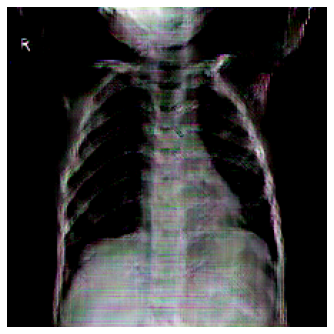

In [172]:
noise = tf.random.normal([BATCH_SIZE, noise_dim])
#noise = tf.random.normal([BATCH_SIZE//4, 224,224,3])
predictions=generator(noise,training=False)
print(np.shape(predictions))

    
'''
layer_filtering = keras.Sequential([tf.keras.layers.Lambda(filtering)])
predictions = predictions.map(lambda x: layer_mult_127(x))
predictions = predictions.map(lambda x: layer_filtering(x))
predictions = predictions.map(lambda x: layer_div_127(x))'''

plt.figure(figsize=(20, 20))
for images in predictions:
    ax = plt.subplot(3, 3, 1)
    plt.imshow(images.numpy())
    plt.axis("off")
    break


Creation of the augmented dataset

In [173]:
generated_images = generator(noise, training=True).numpy()
card=tf.data.experimental.cardinality(train_set_normal_16)
for k in range(1,card):
  noise = tf.random.normal([num_examples_to_generate, noise_dim])
  seed = tf.random.normal([num_examples_to_generate, noise_dim])

  generated_images_1 = generator(noise, training=True).numpy()
  generated_images = np.concatenate((generated_images,generated_images_1),axis=0)

#generated_images=filter(generated_images)

In [174]:
augmented_set_normal=tf.data.Dataset.from_tensors(tf.convert_to_tensor(generated_images))

In [175]:
train_set_normal=create_new_dataset_normal(train_set_normal_16,augmented_set_normal)


In [176]:
'''del augmented_set_normal
del generated_images
del predictions
del generator
del discriminator'''

'del augmented_set_normal\ndel generated_images\ndel predictions\ndel generator\ndel discriminator'

Same thing with the dataset Pneumonia

In [177]:
EPOCHS = 1000
noise_dim = 500
num_examples_to_generate = 8
BATCH_SIZE=8

seed = tf.random.normal([num_examples_to_generate, noise_dim])
acc=tf.keras.metrics.Accuracy()

In [178]:
discriminator = make_discriminator_model2()
generator = make_generator_model()
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(5e-5)
train_pneumonia(train_set_pneumonia_16,EPOCHS)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [179]:
generated_images = generator(noise, training=True).numpy()
card=tf.data.experimental.cardinality(train_set_pneumonia_16)
for k in range(1,card):
  noise = tf.random.normal([num_examples_to_generate, noise_dim])
  seed = tf.random.normal([num_examples_to_generate, noise_dim])

  generated_images_1 = generator(noise, training=True).numpy()
  generated_images = np.concatenate((generated_images,generated_images_1),axis=0)

In [180]:
augmented_set_pneumonia=tf.data.Dataset.from_tensors(tf.convert_to_tensor(generated_images))

In [181]:
train_set_pneumonia = create_new_dataset_pneumonia(train_set_pneumonia_16,augmented_set_pneumonia)
'''del augmented_set_pneumonia
del generated_images
del generator
del discriminator'''

'del augmented_set_pneumonia\ndel generated_images\ndel generator\ndel discriminator'

Concatenation of the 2 dataset and training of classifier

In [182]:
card=tf.data.experimental.cardinality(train_set_pneumonia)

train_set=train_set_normal.concatenate(train_set_pneumonia)
train_set.shuffle(2*card*32,reshuffle_each_iteration=False).cache().prefetch(buffer_size=AUTOTUNE)

'''del train_set_normal
del train_set_pneumonia'''

'del train_set_normal\ndel train_set_pneumonia'

In [183]:


layer_mult_127 = keras.Sequential([tf.keras.layers.Lambda(mult_127)])

train_set = train_set.map(lambda x,y: (layer_mult_127(x),y))

In [244]:
base_model = keras.applications.VGG16(
      weights="imagenet",  # Load weights pre-trained on ImageNet.
      input_shape=(224, 224, 3),
      include_top=False,
      
  ) 

  # Freeze the base_model


base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(224, 224, 3))
#x = data_augmentation(inputs)  # Apply random data augmentation

# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = tf.keras.applications.vgg16.preprocess_input(inputs)
x = base_model(x, training=False)
x = keras.layers.Dropout(0.4)(x)  # Regularize with dropout
x = keras.layers.GlobalAveragePooling2D()(x)

outputs = keras.layers.Dense(2)(x)
model = keras.Model(inputs, outputs)

In [245]:
def scheduler(epoch, lr):
  if epoch <10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [246]:
lr=10e-4
epochs = 100
model.compile(
    optimizer=keras.optimizers.Adam(lr),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()])

earlystop= tf.keras.callbacks.EarlyStopping(
    monitor='val_binary_accuracy', min_delta=0.001, patience=10)

schedule = tf.keras.callbacks.LearningRateScheduler(scheduler)


history=model.fit(train_set, 
                  epochs=epochs, 
                  validation_data=val_set,
                  callbacks=[earlystop,schedule])
model.evaluate(test_set)

Epoch 1/100
572/572 [==============================] - 9s 15ms/step - loss: 1.1910 - binary_accuracy: 0.9156 - val_loss: 11.6307 - val_binary_accuracy: 0.5000
Epoch 2/100
572/572 [==============================] - 9s 15ms/step - loss: 4.1962 - binary_accuracy: 0.8975 - val_loss: 10.8648 - val_binary_accuracy: 0.5000
Epoch 3/100
572/572 [==============================] - 9s 15ms/step - loss: 3.6573 - binary_accuracy: 0.9011 - val_loss: 5.4065 - val_binary_accuracy: 0.5000
Epoch 4/100
572/572 [==============================] - 8s 15ms/step - loss: 1.5473 - binary_accuracy: 0.9282 - val_loss: 2.7236 - val_binary_accuracy: 0.6061
Epoch 5/100
572/572 [==============================] - 8s 15ms/step - loss: 0.7571 - binary_accuracy: 0.9483 - val_loss: 1.3875 - val_binary_accuracy: 0.7045
Epoch 6/100
572/572 [==============================] - 9s 15ms/step - loss: 0.4100 - binary_accuracy: 0.9597 - val_loss: 1.0203 - val_binary_accuracy: 0.7557
Epoch 7/100
572/572 [=============================

[0.586942732334137, 0.841796875]

In [247]:
base_model.trainable = True

# Fine-tune from this layer onwards
fine_tune_at = 15

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(lr/20),
              metrics=[keras.metrics.BinaryAccuracy()])

model.fit(train_set, 
          epochs=epochs, 
          validation_data=val_set,
          callbacks=[earlystop,schedule])
model.evaluate(test_set)

Epoch 1/100
572/572 [==============================] - 11s 18ms/step - loss: 0.0075 - binary_accuracy: 0.9996 - val_loss: 148.2037 - val_binary_accuracy: 0.5000
Epoch 2/100
572/572 [==============================] - 10s 18ms/step - loss: 12.2525 - binary_accuracy: 0.9392 - val_loss: 26.9900 - val_binary_accuracy: 0.5000
Epoch 3/100
572/572 [==============================] - 10s 18ms/step - loss: 5.0834 - binary_accuracy: 0.4713 - val_loss: 0.6937 - val_binary_accuracy: 0.5000
Epoch 4/100
572/572 [==============================] - 10s 18ms/step - loss: 0.7158 - binary_accuracy: 0.5000 - val_loss: 0.6936 - val_binary_accuracy: 0.5000
Epoch 5/100
572/572 [==============================] - 10s 18ms/step - loss: 0.7146 - binary_accuracy: 0.5000 - val_loss: 0.6936 - val_binary_accuracy: 0.5000
Epoch 6/100
572/572 [==============================] - 10s 18ms/step - loss: 0.7136 - binary_accuracy: 0.5000 - val_loss: 0.6935 - val_binary_accuracy: 0.5000
Epoch 7/100
572/572 [=====================

[0.691421389579773, 0.5]

In [248]:
predictions=model.predict(test_set)

In [249]:
for images,labels in test_set:
  print (labels)
for pred in predictions:
  if pred[0]>pred[1]:
    print(0)
  else :
    print(1)

tf.Tensor(
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]], shape=(8, 2), dtype=float32)
tf.Tensor(
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]], shape=(8, 2), dtype=float32)
tf.Tensor(
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]], shape=(8, 2), dtype=float32)
tf.Tensor(
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]], shape=(8, 2), dtype=float32)
tf.Tensor(
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]], shape=(8, 2), dtype=float32)
tf.Tensor(
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]], shape=(8, 2), dtype=float32)
tf.Tensor(
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]], shape=(8, 2), dtype=float32)
tf.Tensor(
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]], shape=(8, 2), dtype=float32)
tf.Tensor(
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]], sha